### 2. Loss Functions

Suppose you have two applications:

- **Application 1:** The dependent variable is continuous.
- **Application 2:** The dependent variable is discrete and binary (only takes values 0 or 1, i.e., $y \in \{0, 1\}$).

You plan to train:
- A **Linear Regression** model for Application 1.
- A **Logistic Regression** model for Application 2.

Two common loss functions are:

- **Mean Squared Error (MSE):**

  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **Binary Cross Entropy (BCE):**

  $$
  \text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
  $$

where:
- $y_i$ is the true value
- $\hat{y}_i$ is the predicted value
- $n$ is the number of samples

MSE is used for regression tasks with continuous targets, while BCE is used for classification tasks with binary targets.

#### 1. Fill the following table and plot both loss functions.

**Table 2: MSE and BCE loss values for different predictions when $y=1$**

| True $y$ | Prediction $\hat{y}$ | MSE           | BCE           |
|----------|---------------------|---------------|---------------|
| 1        | 0.005               |               |               |
| 1        | 0.01                |               |               |
| 1        | 0.05                |               |               |
| 1        | 0.1                 |               |               |
| 1        | 0.2                 |               |               |
| 1        | 0.3                 |               |               |
| 1        | 0.4                 |               |               |
| 1        | 0.5                 |               |               |
| 1        | 0.6                 |               |               |
| 1        | 0.7                 |               |               |
| 1        | 0.8                 |               |               |
| 1        | 0.9                 |               |               |
| 1        | 1.0                 |               |               |

Fill in the MSE and BCE values for each prediction. Then, plot both loss functions (MSE and BCE) as a function of the predicted value $\hat{y}$ for $y=1$.

In [4]:
import numpy as np
import pandas as pd

# True value
y_true = 1

# Predictions
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# MSE calculation
mse = (y_true - y_pred) ** 2

# BCE calculation (avoid log(0) by clipping predictions)
eps = 1e-10
y_pred_clipped = np.clip(y_pred, eps, 1 - eps)
bce = - (y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
bce_rounded = np.round(bce, 6)

# Create DataFrame
df = pd.DataFrame({
    'True y': y_true,
    'Prediction y_hat': y_pred,
    'MSE': mse,
    'BCE': bce_rounded
})

print(df)

    True y  Prediction y_hat       MSE       BCE
0        1             0.005  0.990025  5.298317
1        1             0.010  0.980100  4.605170
2        1             0.050  0.902500  2.995732
3        1             0.100  0.810000  2.302585
4        1             0.200  0.640000  1.609438
5        1             0.300  0.490000  1.203973
6        1             0.400  0.360000  0.916291
7        1             0.500  0.250000  0.693147
8        1             0.600  0.160000  0.510826
9        1             0.700  0.090000  0.356675
10       1             0.800  0.040000  0.223144
11       1             0.900  0.010000  0.105361
12       1             1.000  0.000000  0.000000


plot the both loss functions.

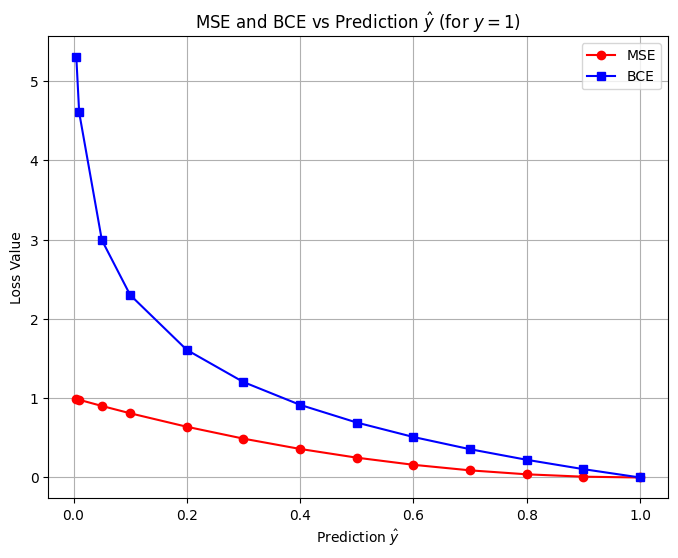

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(y_pred, mse, marker='o', color='red', label='MSE')
plt.plot(y_pred, bce_rounded, marker='s', color='blue', label='BCE')
plt.xlabel('Prediction $\hat{y}$')
plt.ylabel('Loss Value')
plt.title('MSE and BCE vs Prediction $\hat{y}$ (for $y=1$)')
plt.legend()
plt.grid(True)
plt.show()

Which loss function (MSE or BCE) would you select for each of the applications
 (Application 1 and 2)? Justify your answer.

For Application 1, the dependent variable is continuous, so MSE is the suitable loss function since it directly measures the average squared difference between predicted and actual continuous values.

For Application 2, the dependent variable is binary, so BCE is the suitable loss function because it measures how well the predicted probabilities match the true binary labels, and it penalizes incorrect confident predictions more effectively than MSE.

#### Understanding the Loss Function Plot

- **X-axis:** Predicted value ($\hat{y}$) from 0 to 1.
- **Y-axis:** Loss value (how bad the prediction is).
- **True label:** $y = 1$ (so we want $\hat{y}$ close to 1).

**Red curve: MSE**
- Formula: $\text{MSE} = (1 - \hat{y})^2$
- Loss decreases smoothly as $\hat{y}$ approaches 1.
- If prediction is very wrong ($\hat{y} = 0$), MSE loss = 1.
- MSE is gentle: it does not strongly punish very wrong predictions.

**Blue curve: BCE**
- Formula: $\text{BCE} = -\log(\hat{y})$ (for $y = 1$)
- Loss is very large if prediction is close to 0 (confidently wrong).
  - Example: if $\hat{y} = 0.01$, loss $\approx 4.6$.
- Loss drops sharply as $\hat{y}$ approaches 1.
- BCE is strict: it heavily penalizes wrong predictions, especially confident ones.

**Key Differences:**
- At $\hat{y} = 0.1$:
  - MSE $\approx 0.81$ (small penalty)
  - BCE $\approx 2.3$ (large penalty)
- At $\hat{y} = 0.9$:
  - MSE $\approx 0.01$ (tiny penalty)
  - BCE $\approx 0.1$ (still small, but larger than MSE)

**Conclusion:**
BCE reacts much more strongly when predictions are far from the truth, making it better for classification tasks. MSE is more forgiving and is suitable for regression tasks.